<a href="https://colab.research.google.com/github/womaro/Story/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
# %pip install --upgrade plotly

In [ ]:
pip freeze | grep plotly

plotly==5.5.0


### Import Statements

In [146]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.shape

(962, 16)

In [5]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD


In [8]:
df_data.sort_values('year').head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
duplicates = df_data[df_data.duplicated()]
duplicates.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO


### Check for NaN Values

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [11]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [80]:
temp = df_data.prize_share.astype(str).str.split("/")
print(temp.loc[3])
print(temp.loc[3][0])
print(temp.loc[3][1])
print(temp)
print(type(temp))

['1', '2']
1
2
0      [1, 1]
1      [1, 1]
2      [1, 1]
3      [1, 2]
4      [1, 2]
        ...  
957    [1, 3]
958    [1, 1]
959    [1, 4]
960    [1, 4]
961    [1, 2]
Name: prize_share, Length: 962, dtype: object
<class 'pandas.core.series.Series'>


In [81]:
for i in range(0, len(temp)):
  temp.loc[i] = int(temp.loc[i][0])/int(temp.loc[i][1])

In [83]:
df_data.insert(3, 'prize_share_percent', temp)

In [86]:
df_data.sample(5)

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,0.25,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR
311,1958,Peace,The Nobel Peace Prize 1958,1.00,NaN,1/1,Individual,Georges Pire,1910-02-10,Dinant,Belgium,Belgium,Male,NaN,NaN,NaN,BEL
435,1973,Peace,The Nobel Peace Prize 1973,0.50,NaN,1/2,Organization,Le Duc Tho,1911-10-14,Nam Ha province,Vietnam,Vietnam,Male,NaN,NaN,NaN,VNM
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1.00,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
620,1992,Chemistry,The Nobel Prize in Chemistry 1992,1.00,"""for his contributions to the theory of electr...",1/1,Individual,Rudolph A. Marcus,1923-07-21,Montreal,Canada,Canada,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,CAN


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [98]:
sex_data = df_data.groupby('sex').count()
sex_data.columns

Index(['year', 'category', 'prize', 'prize_share_percent', 'motivation',
       'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [99]:
fig = px.pie(sex_data, values='prize', names=sex_data.index, title='Woman and Man - Nobel Prizes distribution.')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [105]:
women_data = df_data.query('sex == "Female"')
women_data.sort_values('year').head(3).full_name

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [108]:
df_data.groupby('full_name').count().sort_values('prize', ascending=False).head(5)

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
full_name,,,,,,,,,,,,,,,,
Comité international de la Croix Rouge (International Committee of the Red Cross),3,3,3,3,0,3,3,0,0,0,0,0,0,0,0,0
"Marie Curie, née Sklodowska",2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2
Linus Carl Pauling,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
Frederick Sanger,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
John Bardeen,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [112]:
category = df_data.groupby('category').count()
category

,year,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
category,,,,,,,,,,,,,,,,
Chemistry,186,186,186,186,186,186,186,186,186,186,186,186,184,185,186,186
Economics,86,86,86,86,86,86,86,86,86,86,86,86,84,84,84,86
Literature,117,117,117,117,117,117,117,117,116,117,117,117,0,0,0,117
Medicine,222,222,222,222,222,222,222,222,221,222,222,222,221,222,222,222
Peace,135,135,135,47,135,135,135,107,106,107,107,107,4,4,4,107
Physics,216,216,216,216,216,216,216,216,216,216,216,216,214,212,212,216


In [113]:
bar = px.bar(x = category.index, # index = category name
             y = category.prize, # count
             title='Prizes by category',
             hover_name=category.index,
             color=category.prize,
             color_continuous_scale='Aggrnyl')
 
bar.update_layout(xaxis_title='Category',
yaxis_title='Number of prizes',
coloraxis_showscale=False)
 
bar.show()

In [130]:
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [115]:
df_data.query('category == "Economics"').sort_values('year').head(1)

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,0.50,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [124]:
cat_sex = df_data.groupby(['category', 'sex'], as_index=False).count()
cat_sex

,category,sex,year,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,organization_name,organization_city,organization_country,ISO
0,Chemistry,Female,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,Chemistry,Male,179,179,179,179,179,179,179,179,179,179,179,177,178,179,179
2,Economics,Female,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Economics,Male,84,84,84,84,84,84,84,84,84,84,84,82,82,82,84
4,Literature,Female,16,16,16,16,16,16,16,16,16,16,16,0,0,0,16
5,Literature,Male,101,101,101,101,101,101,101,101,100,101,101,0,0,0,101
6,Medicine,Female,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,Medicine,Male,210,210,210,210,210,210,210,210,209,210,210,209,210,210,210
8,Peace,Female,17,17,17,10,17,17,17,17,17,17,17,0,0,0,17
9,Peace,Male,90,90,90,25,90,90,90,90,89,90,90,4,4,4,90


In [129]:
fig = px.bar(cat_sex, x="category", y="prize", color="sex", title="Women and Mans by prize category")
fig.show()

In [131]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [132]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [136]:
prize_over_years = df_data.groupby('year', as_index=False).agg({'prize': pd.Series.count})
prize_over_years

,year,prize
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5
...,...,...
112,2016,11
113,2017,12
114,2018,13
115,2019,14


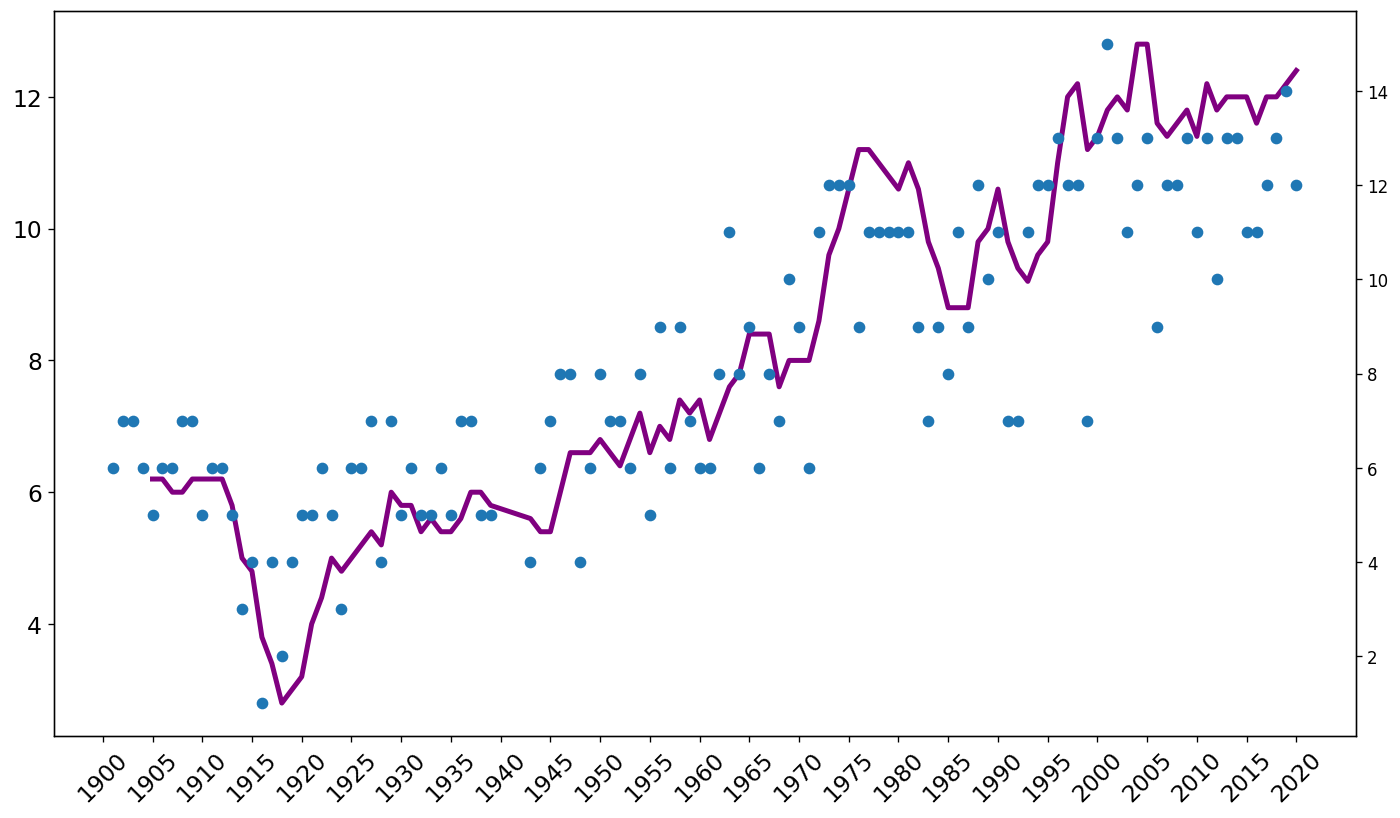

In [160]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

roll_df = prize_over_years[['prize']].rolling(window=5).mean()
 
ax1.plot(prize_over_years.year, roll_df.prize, 'purple', linewidth=3, linestyle='-')
ax2.scatter(prize_over_years.year, prize_over_years.prize)
 
plt.show()

In [142]:
roll_df = prize_over_years[['prize']].rolling(window=5).mean()
roll_df

,prize
0,NaN
1,NaN
2,NaN
3,NaN
4,6.20
...,...
112,11.60
113,12.00
114,12.00
115,12.20


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [166]:
top20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values(by='prize', inplace=True)
top20_countries = top20_countries[-20:]

In [168]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [169]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [170]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [171]:
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [172]:
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [173]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

In [174]:
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [175]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [176]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [177]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [179]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [180]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [182]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [183]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [206]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [185]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [186]:
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [187]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [188]:
df_data.head()

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1.00,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,1.00,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1.00,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,0.50,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,0.50,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [191]:
winning_age = df_data.year - pd.DatetimeIndex(df_data.birth_date).year
winning_age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Length: 962, dtype: float64

In [ ]:
df_data.insert(9, 'winning_age', winning_age)

In [195]:
df_data.sample(5)

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,winning_age,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
650,1995,Chemistry,The Nobel Prize in Chemistry 1995,0.33,"""for their work in atmospheric chemistry, part...",1/3,Individual,F. Sherwood Rowland,1927-06-28,68.00,"Delaware, OH",United States of America,United States of America,Male,University of California,"Irvine, CA",United States of America,USA
754,2003,Peace,The Nobel Peace Prize 2003,1.00,"""for her efforts for democracy and human right...",1/1,Individual,Shirin Ebadi,1947-06-21,56.00,Hamadan,Iran,Iran,Female,NaN,NaN,NaN,IRN
339,1962,Medicine,The Nobel Prize in Physiology or Medicine 1962,0.33,"""for their discoveries concerning the molecula...",1/3,Individual,Maurice Hugh Frederick Wilkins,1916-12-15,46.00,Pongaroa,New Zealand,New Zealand,Male,London University,London,United Kingdom,NZL
444,1974,Medicine,The Nobel Prize in Physiology or Medicine 1974,0.33,"""for their discoveries concerning the structur...",1/3,Individual,Albert Claude,1898-08-24,76.00,Longlier,Belgium,Belgium,Male,Université Catholique de Louvain,Louvain,Belgium,BEL
454,1975,Economics,The Sveriges Riksbank Prize in Economic Scienc...,0.50,"""for their contributions to the theory of opti...",1/2,Individual,Tjalling C. Koopmans,1910-08-28,65.00,s Graveland,Netherlands,Netherlands,Male,Yale University,"New Haven, CT",United States of America,NLD


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [201]:
display(df_data.nlargest(n=3, columns='winning_age'))
display(df_data.nsmallest(n=3, columns='winning_age'))

,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,winning_age,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,0.33,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,97.00,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU
933,2018,Physics,The Nobel Prize in Physics 2018,0.50,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,96.00,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA
794,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,0.33,"""for having laid the foundations of mechanism ...",1/3,Individual,Leonid Hurwicz,1917-08-21,90.00,Moscow,Russia,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,RUS


,year,category,prize,prize_share_percent,motivation,prize_share,laureate_type,full_name,birth_date,winning_age,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
885,2014,Peace,The Nobel Peace Prize 2014,0.50,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,17.00,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK
85,1915,Physics,The Nobel Prize in Physics 1915,0.50,"""for their services in the analysis of crystal...",1/2,Individual,William Lawrence Bragg,1890-03-31,25.00,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS
932,2018,Peace,The Nobel Peace Prize 2018,0.50,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,25.00,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [197]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

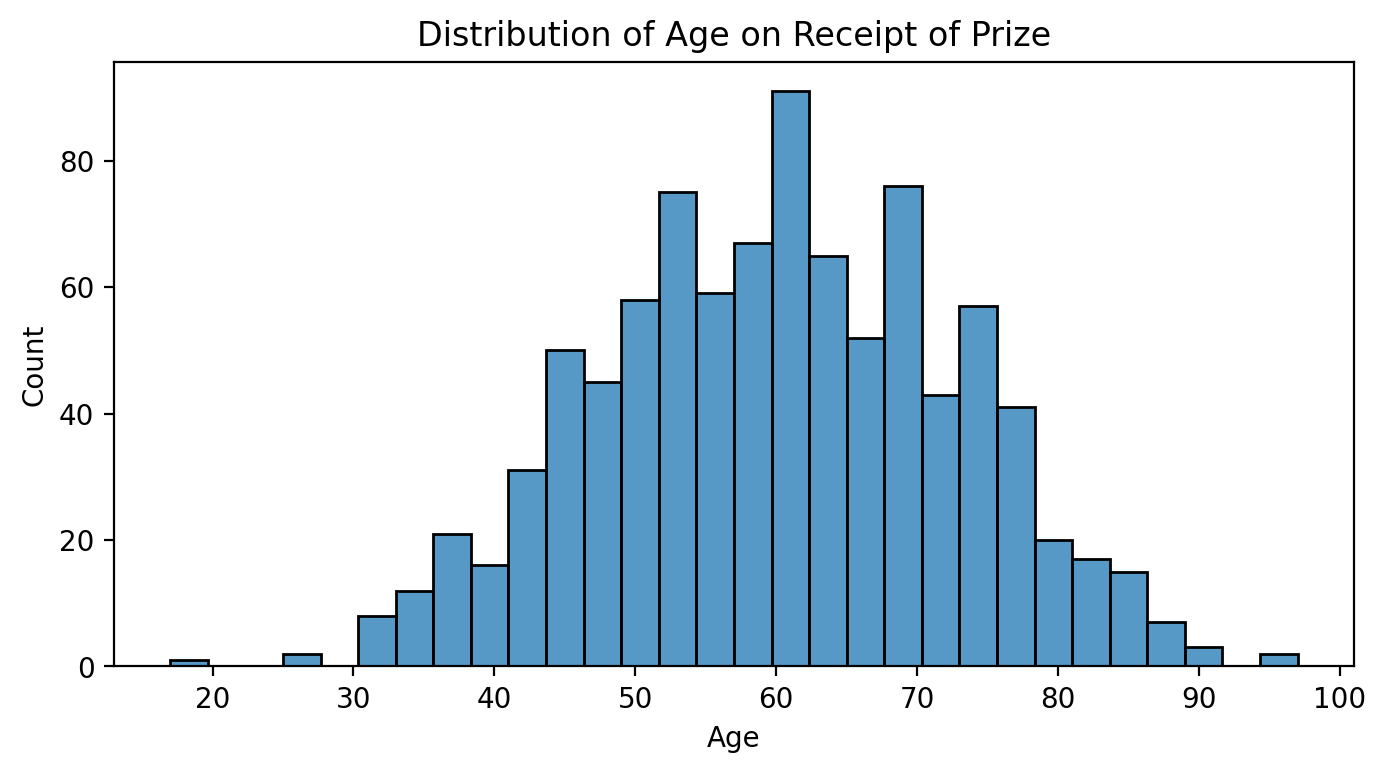

In [198]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


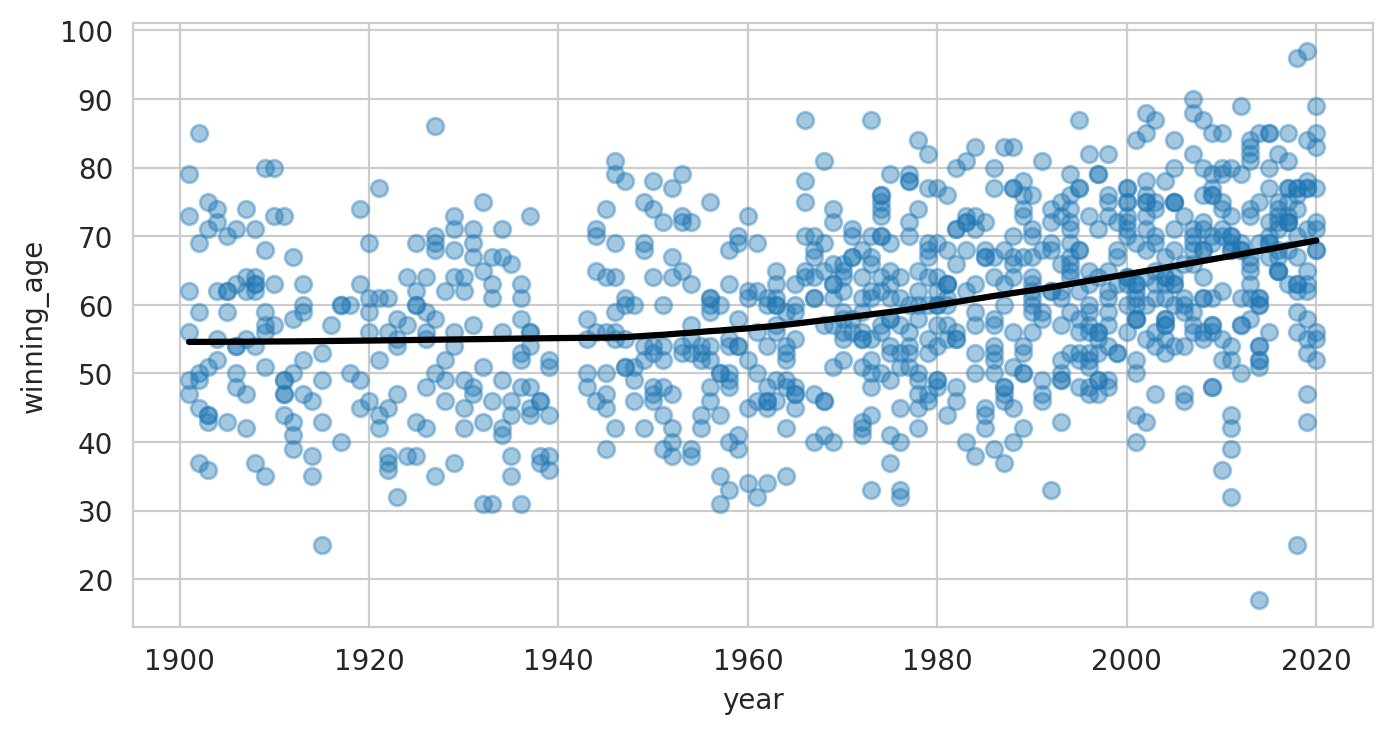

In [199]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

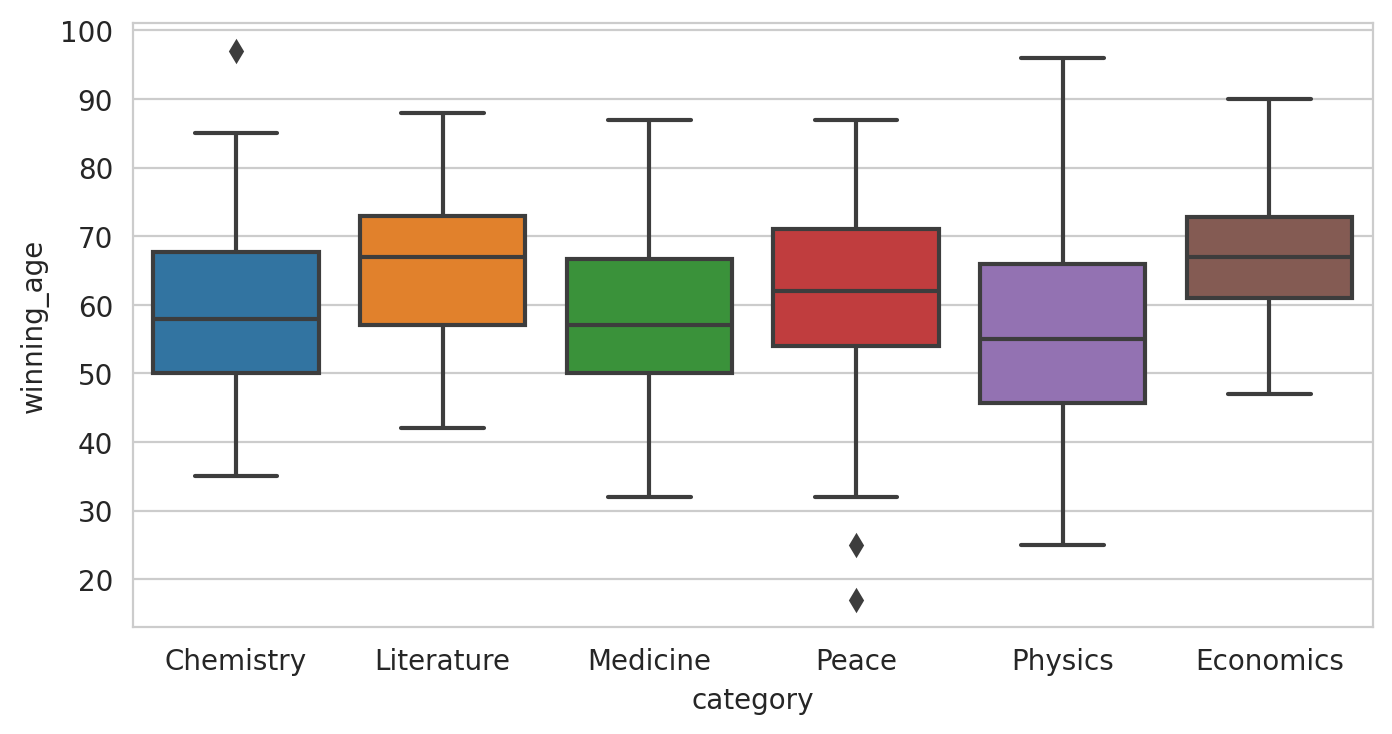

In [202]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


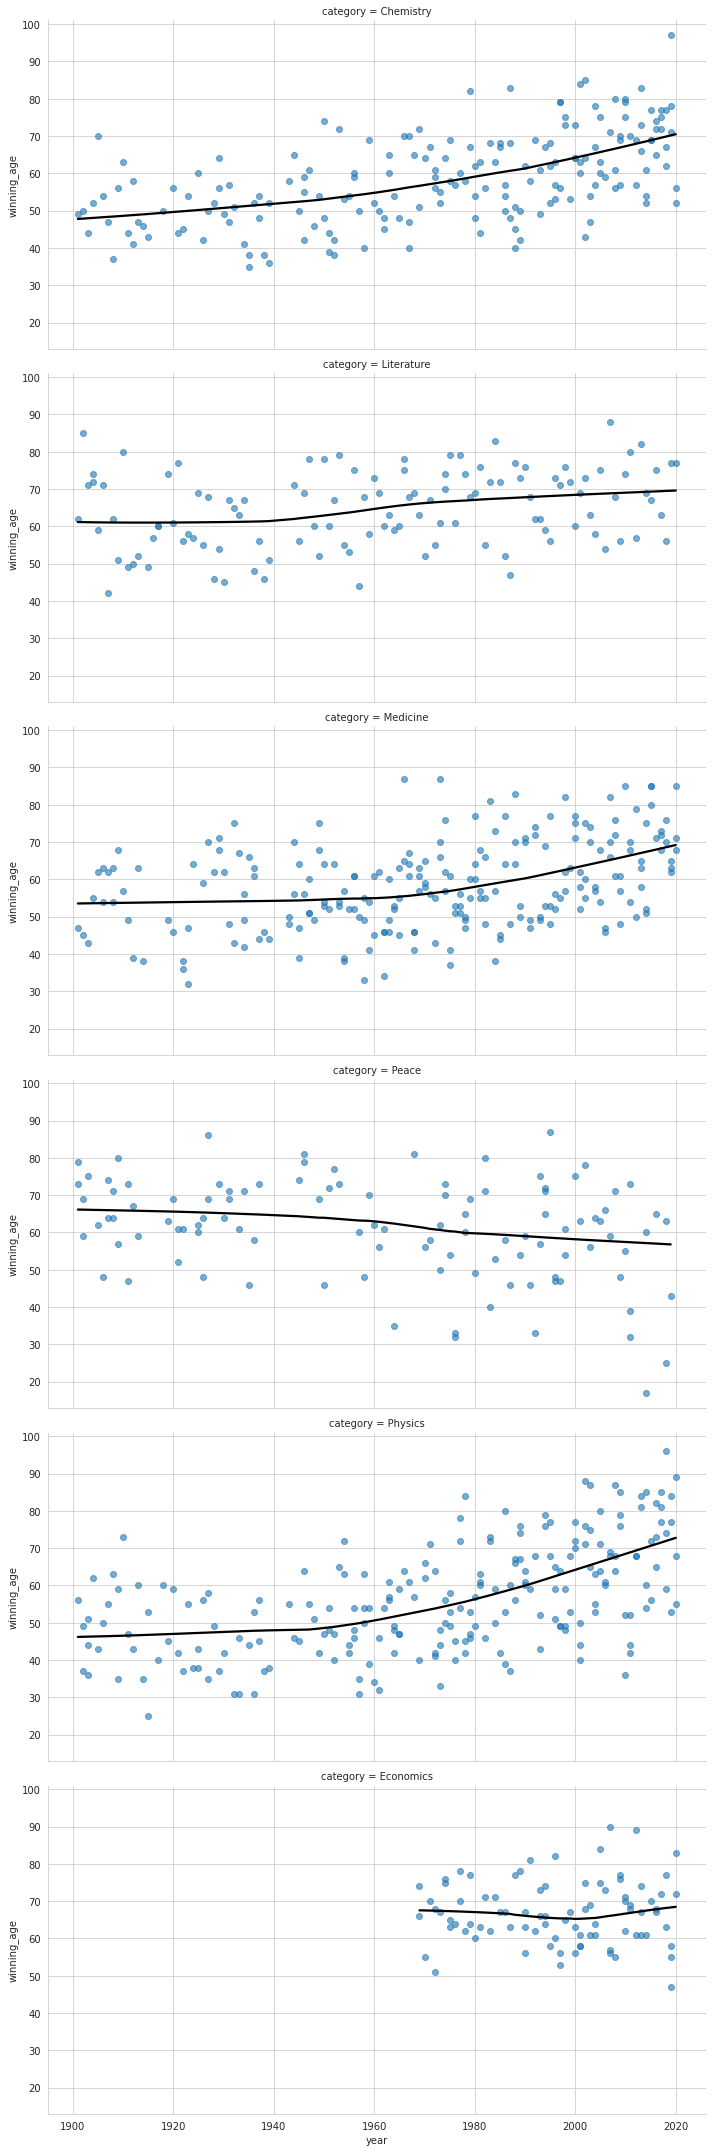

In [204]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()
 

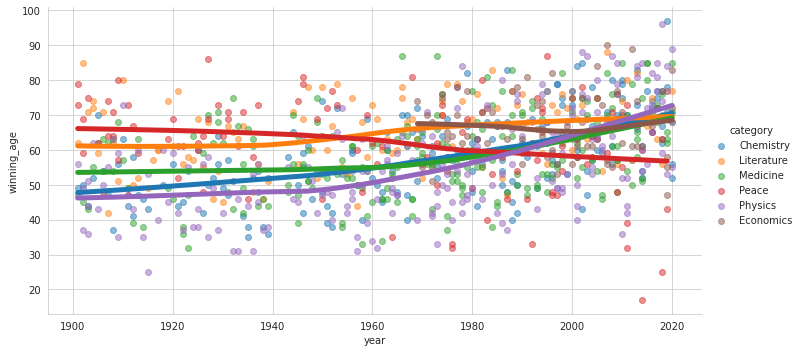

In [205]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
plt.show()